# TP 1: Méthodes de Clustering

## 1  Initiation à Python et à l'usage des principales librairies

### 1.1  Tests élémentaires sous Python

#### 1.1.1  Création du corpus de test

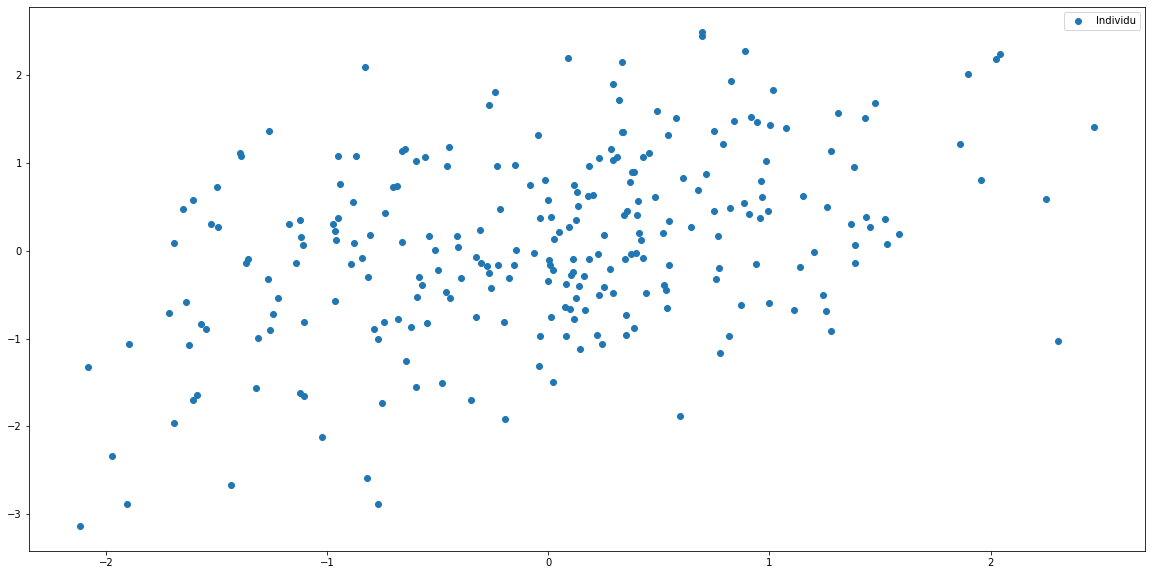

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import matplotlib as mp
mp.rcParams['figure.figsize'] = 20,10
mp.rcParams['axes.labelsize'] = 10
mp.rcParams['lines.linewidth'] = 3


# Simulation de n=256 données X=(X1,X2) suivant une loi normale bidimensionnelle
# de moyenne (0,0), de la variance Var(X1)=1, Var(X2)=1 et la covariance Cov(X1,X2)=0.5
mean = np.array([0, 0])
cov = np.array([[1, 0.5], 
                [0.5, 1]])
X = (np.random.multivariate_normal(mean, cov, 256))

# Affichage des données
plt.plot(X[:,0], X[:,1], 'o', label='Individu')
plt.legend()

* Adapter les lignes de code décrit ci-dessus pour construire votre ensemble de test de taille 256 individus par 2 mesures correspondant aux deux classes.Afficher vos deux classes avec des symboles/couleurs différents selon la classe

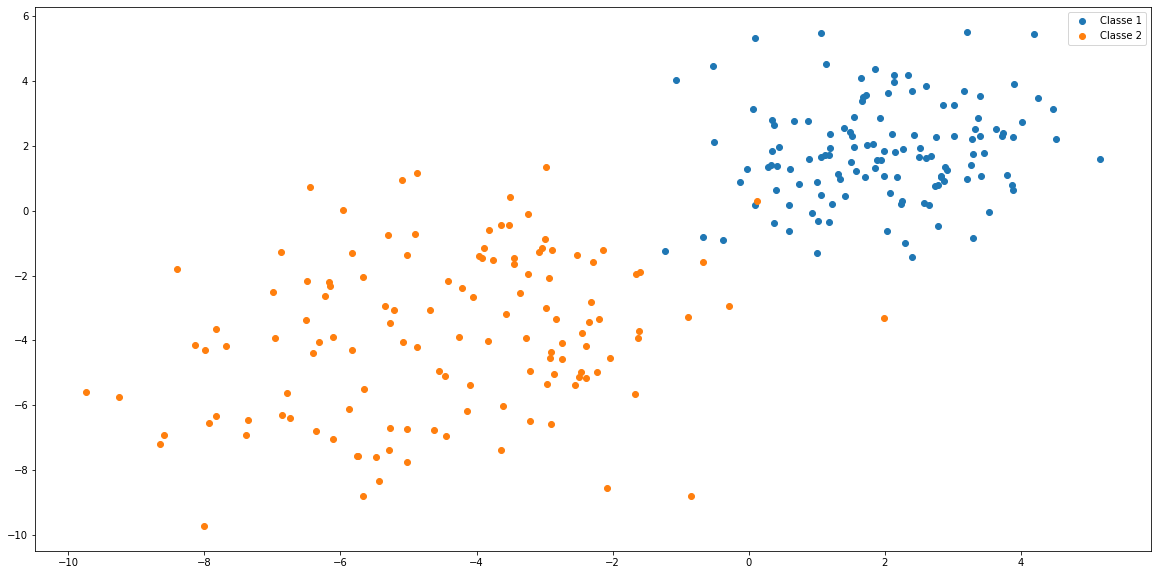

In [37]:
size = 128

mean1 = np.array([2, 2])
cov1 = np.array([[2, 0], 
                 [0, 2]])
X1 = (np.random.multivariate_normal(mean1, cov1, size))

mean2 = np.array([-4, -4])
cov2 = np.array([[6, 0], 
                 [0, 6]])
X2 = (np.random.multivariate_normal(mean2, cov2, size))

plt.plot(X1[:, 0], X1[:, 1], 'o', label='Classe 1')
plt.plot(X2[:, 0], X2[:, 1], 'o', label='Classe 2')
plt.legend()

#### 1.1.2  Méthode de K-means

##### 1.1.2.1  Test de la Méthode de K-means

* Effectuer le clustering de vos données data en K clusters par la méthode de K-means à l’aide de l’objet KMeans du module cluster de la bibliothéque sklearn:

```python
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=K, n_init=1, init='k-means++')
kmeans.fit(data)
```

In [38]:
from sklearn.cluster import KMeans

K = 2
data = np.concatenate((X1, X2))

kmeans = KMeans(n_clusters=K, n_init=1, init='k-means++')
kmeans.fit(data)

KMeans(n_clusters=2, n_init=1)

* Essayez différentes valeurs de nombre de clusters K. Interpréter le résultat de clustering donné par l’attribut `kmeans.labels_`

In [39]:
for K in range(2, 10):
    print("Pour K = ", K, ", le résultat du clustering est\n",
          KMeans(n_clusters=K, n_init=1, init='k-means++').fit(data).labels_)

Pour K =  2 , le résultat du clustering est
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Pour K =  3 , le résultat du clustering est
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 0 2 2 2 0 0 2 0 0 2 2 0 0 2 0 2 0 2
 2 2 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 0 0 0 1 2 2 0 2 2 0 2 0 0 2 2 0 2 2 0 2
 0 0 0 2 0 2 0 

* Afficher graphiquement le résultat du clustering avec deux couleurs/symboles à l’aide de kmeans.labels_. Etudier les différences avec la “vraie" classification. `adjusted_rand_score` du module metrics de la bibliothéque sklearn permet de calculer l’erreur entre la classification obtenue et la classification “vraie”. Etudier l’aide pour comprendre la mesure

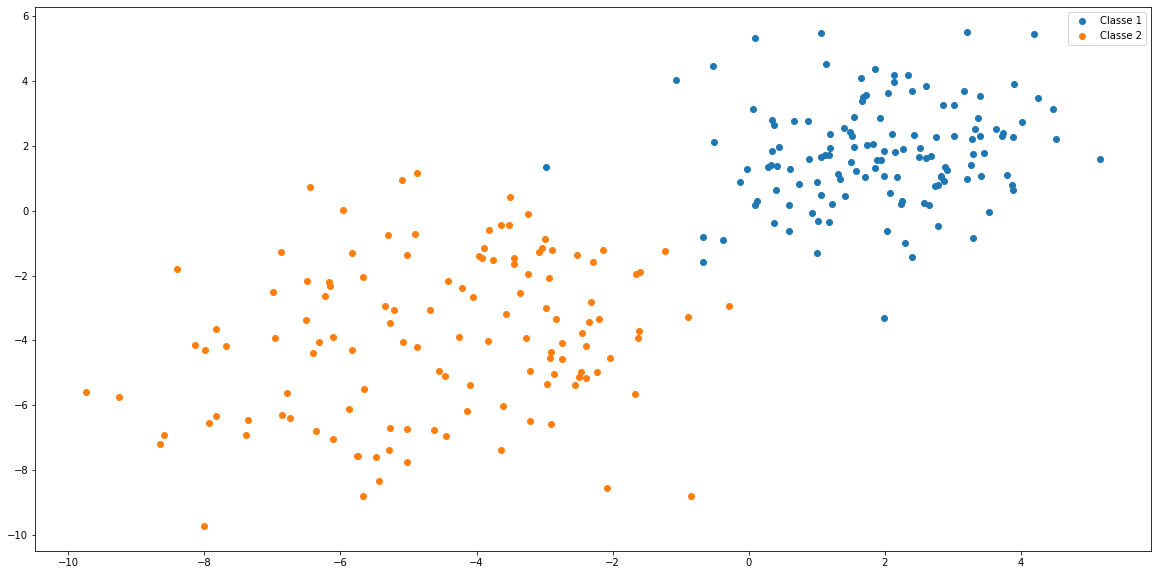

In [40]:
K = 2

for i in range(K):
    plt.plot(data[kmeans.labels_[:] == i, 0], data[kmeans.labels_[:] == i, 1], 'o', label=('Classe ' + str(i + 1)))
plt.legend()

* Utiliser la fonction `adjusted_rand_score` pour calculer le taux d’erreur

In [41]:
from sklearn.metrics import adjusted_rand_score

print("Le taux d'erreur est de {0:.2f}"
      .format((1 - adjusted_rand_score(kmeans.labels_, np.concatenate((np.zeros(128), np.ones(128))))) * 100) + "%")

Le taux d'erreur est de 7.69%


* A quoi sert le paramètre `n_init` ? Essayer une autre valeur que 1 et commenter les différences (ou l’absence de différences)

In [42]:
# n_init sert à définir le nombre de fois que l'algo de K-means est exécuté

for n in [2, 5, 10, 50, 100]:
    print("Pour n_init = ", n, ", le taux d'erreur est de {0:.2f}"
      .format((1 - adjusted_rand_score(KMeans(n_clusters=K, n_init=n, init='k-means++').fit(data).labels_, np.concatenate((np.zeros(128), np.ones(128))))) * 100) + "%")

Pour n_init =  2 , le taux d'erreur est de 7.69%
Pour n_init =  5 , le taux d'erreur est de 7.69%
Pour n_init =  10 , le taux d'erreur est de 7.69%
Pour n_init =  50 , le taux d'erreur est de 7.69%
Pour n_init =  100 , le taux d'erreur est de 7.69%


##### 1.1.2.2  Choix du “bon” nombre de clusters

* Séparer les données data en K = 2, 3, 4, 5, 6 clusters à l’aide de la fonction KMeans

In [43]:
for K in list(range(2, 7)):
    kmeans = KMeans(n_clusters=K, n_init=1, init='k-means++').fit(data)

* Calculer les largeurs de silhouettes des observations et le coefficient de silhouette:

In [44]:
from sklearn.metrics import silhouette_samples, silhouette_score

K = 3

kmeans = KMeans(n_clusters=K, n_init=1, init='k-means++').fit(data)
cluster_labels=kmeans.labels_

silhouette_avg = silhouette_score(data, cluster_labels)
print("Pour le nombre de clusters K =", K,
      "Le coefficient de silhouette est {0:.2f}".format(silhouette_avg))

# Calcul des largeurs de silhouette :
sample_silhouette_values = silhouette_samples(data, cluster_labels)

Pour le nombre de clusters K = 3 Le coefficient de silhouette est 0.51


* Extraire le coefficient d’inertie selon le nombre de clusters (champ kmeans.inertia_). Afficher le coefficient de silhouette et l’inertie selon le nombre de classes.

In [45]:
for K in list(range(2, 7)):
    kmeans = KMeans(n_clusters=K, n_init=1, init='k-means++').fit(data)
    print("Pour le nombres de clusters K = ", K, ":\n",
          "Le coefficient de silhouette est {0:.2f}\n".format(silhouette_score(data, kmeans.labels_)),
          "L'inertie est {0:.2f}\n".format(kmeans.inertia_), sep='')

Pour le nombres de clusters K = 2:
Le coefficient de silhouette est 0.62
L'inertie est 1789.75

Pour le nombres de clusters K = 3:
Le coefficient de silhouette est 0.51
L'inertie est 1217.86

Pour le nombres de clusters K = 4:
Le coefficient de silhouette est 0.34
L'inertie est 1020.53

Pour le nombres de clusters K = 5:
Le coefficient de silhouette est 0.50
L'inertie est 841.47

Pour le nombres de clusters K = 6:
Le coefficient de silhouette est 0.36
L'inertie est 691.55



* Choisir le meilleur paramètre K pour le clustering

In [46]:
# Le meilleur paramètre K est celui pour lequel le coefficient de silouhette est le plus près de 1
# et l'inertie est la plus grande, ici il faut prendre K = 2

#### 1.1.3  Clustering ascendant hiérarchique

* Appliquer l’algorithme de clustering ascendant (CAH) du module `cluster` de la bibliothéque `scipy` en utlisant l’objet `hierarchy`:

In [47]:
from scipy.cluster.hierarchy import linkage as CAH

# Calculer les dissimilarités entres les clusters à chaque  ́etape:
Z_complete = CAH(data, method='complete', metric='euclidean')

* Afficher le dendrogramme sans seuil

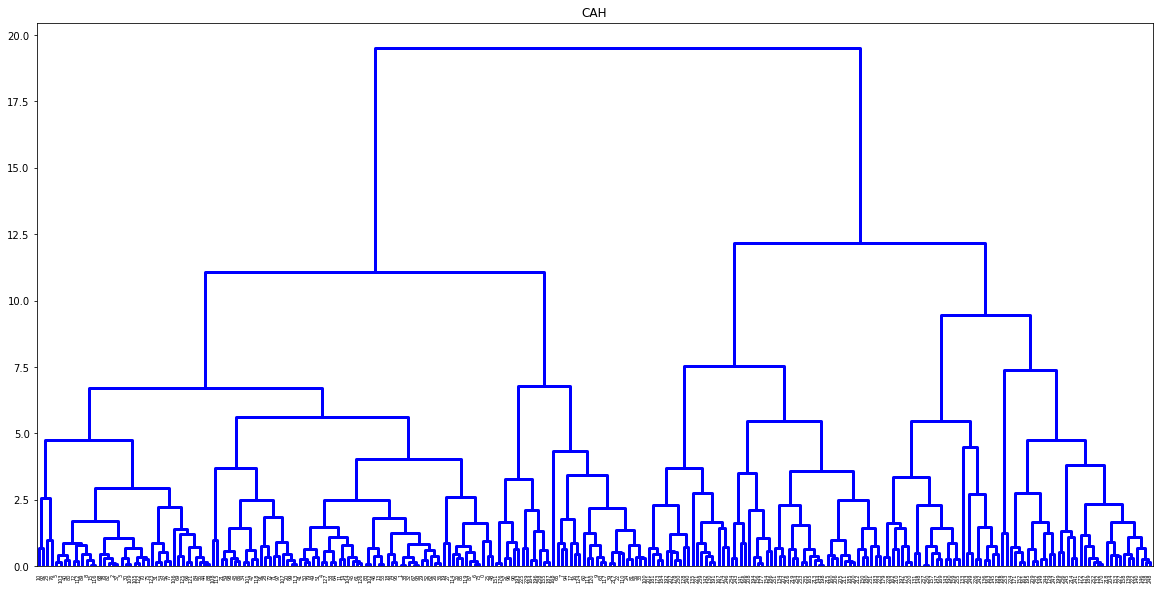

In [48]:
from scipy.cluster.hierarchy import dendrogram

# Calculer les dissimilarités entres les clusters à chaque étape:
plt.title("CAH")
d = dendrogram(Z_complete, color_threshold=0)

* Afficher le dendrogramme pour K = 3 clusters. Pour cela, choisir le seuil adapté (paramètre color threshold)

Vous pouvez extraire la classification en K = 3 clusters en utilisant les commandes suivantes (en choisissant
le seuil) :

```python
from scipy.cluster.hierarchy import fcluster
groupes_cah = fcluster(Z, t=seuil, criterion='distance')
# Ajouter la ligne horizontale de la coupe
plt.axhline(y=seuil, c='grey', lw=1, linestyle='dashed')
```

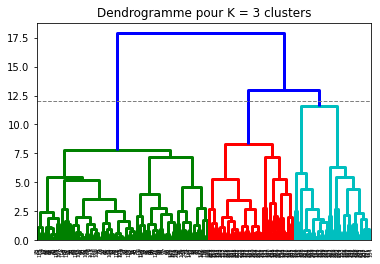

In [49]:
from scipy.cluster.hierarchy import fcluster

K = 3

for i in range(1, 20):
    groupes_cah = fcluster(Z_complete, t=i, criterion='distance')
    values = np.unique(groupes_cah)
    if len(values) == K:
        seuil = i
        break

# Ajouter la ligne horizontale de la coupe
plt.axhline(y=seuil, c='grey', lw=1, linestyle='dashed')

plt.title("Dendrogramme pour K = 3 clusters")
d = dendrogram(Z_complete, color_threshold=seuil)

* Choisir le seuil automatiquement à l’aide de la troisième variable `Z_complete[,2]` de `Z_complete` qui donne la hauteur de dendrogramme des clusters fusionnés à chaque étape

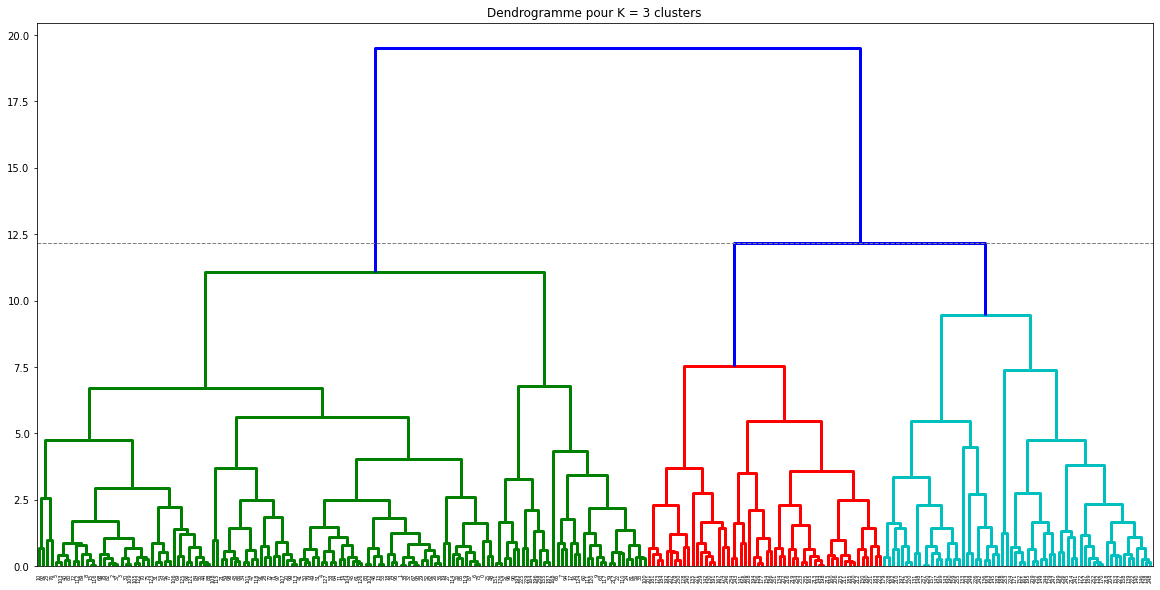

In [50]:
K = 3

seuil = Z_complete[len(Z_complete) - K + 1, 2]

# Ajouter la ligne horizontale de la coupe
plt.axhline(y=seuil, c='grey', lw=1, linestyle='dashed')

plt.title("Dendrogramme pour K = {0} clusters".format(K))
d = dendrogram(Z_complete, color_threshold=seuil)

* Afficher graphiquement le résultat du clustering avec trois couleurs/symboles à l’aide de `groupes_cah`. Analyser la classification.

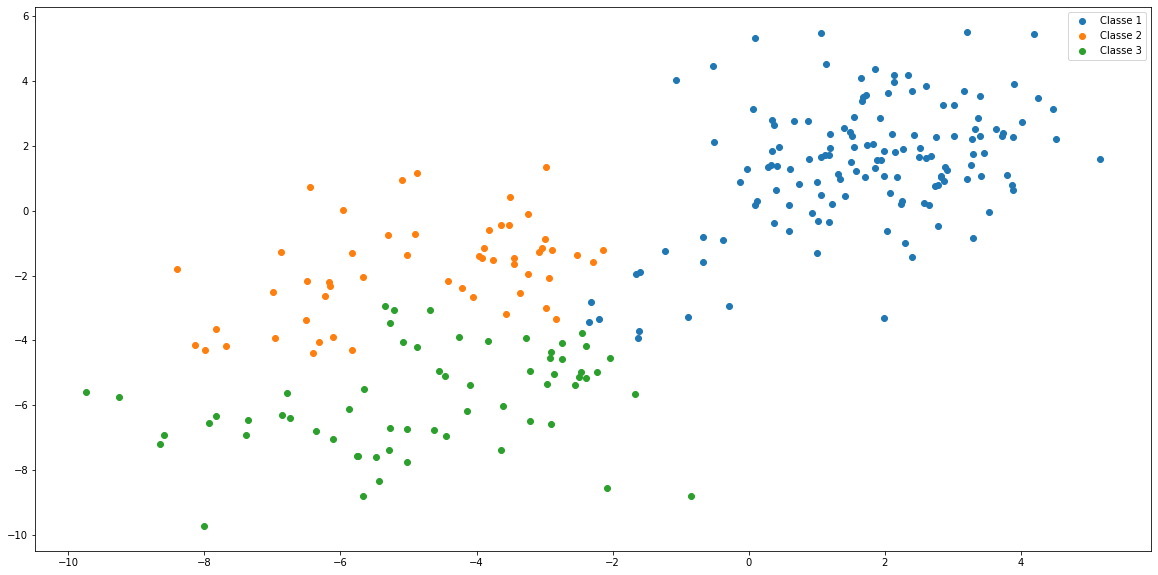

In [51]:
groupes_cah = fcluster(Z_complete, t=seuil - 0.000001, criterion="distance")

for i in list(range(1, K + 1)):
    plt.plot(data[groupes_cah[:] == i, 0], data[groupes_cah[:] == i, 1], 'o', label=('Classe ' + str(i)))
plt.legend()

* Comparer les résultats de clustering en K = 2 clusters avec les quatre méthodes : lien simple `single`, lien complet `complete`, lien moyen `average`, et la dissimilarité de Ward `ward`. Présenter quatre dendrogrammes sur le même graphe. Pour calculer l’efficacité, vous pouvez utiliser `adjusted_rand_score` et ainsi comparer quantitativement les techniques. Comparer avec le résultats obtenus avec K-Means.

Pour la métohode single, le taux d'erreur est de 100.00%
Pour la métohode complete, le taux d'erreur est de 17.94%
Pour la métohode average, le taux d'erreur est de 7.69%
Pour la métohode ward, le taux d'erreur est de 7.69%


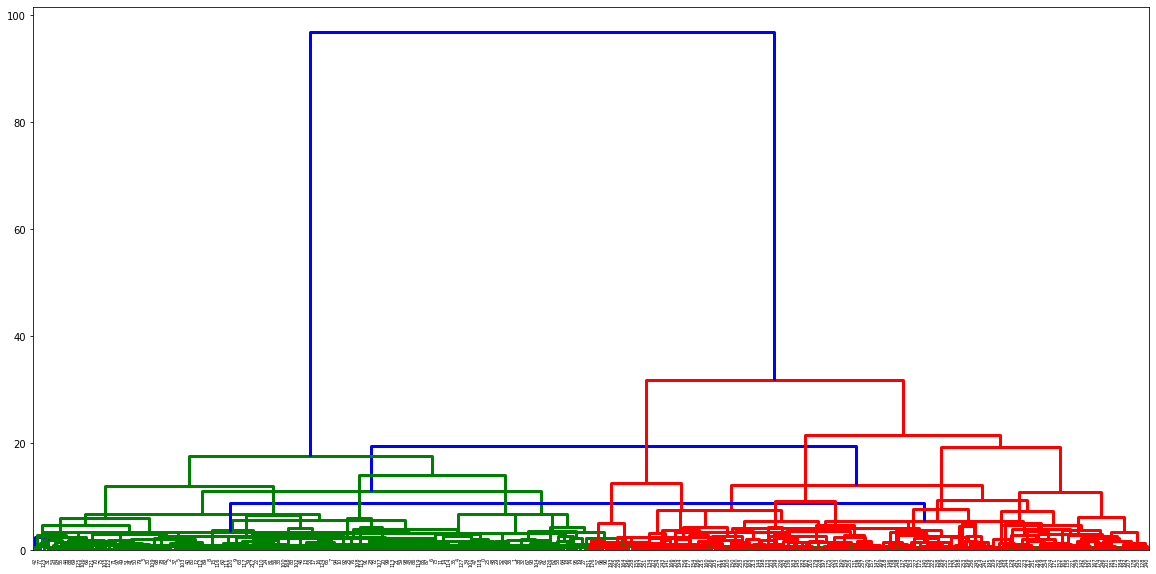

In [52]:
K = 2

for method in ["single", "complete", "average", "ward"]:
    Z = CAH(data, method=method, metric="euclidean")
    seuil = Z[len(Z) - K + 1, 2]
    dendrogram(Z, color_threshold=seuil)
    groupes_cah = fcluster(Z, t=seuil-0.000001, criterion="distance")
    print("Pour la métohode ", method, ", le taux d'erreur est de {0:.2f}"
      .format((1 - adjusted_rand_score(groupes_cah, np.concatenate((np.ones(128), np.ones(128) * 2)))) * 100) + "%", sep='')

## 1.2  Application dans un contexte de données réelles

### 1.2.1  Utilisation de la m ́ethode K-Means pour la réduction de couleur

* Charger l’image visage.bmp

* Organiser les données de l’image couleur sous la forme d’un tableau 256*256 lignes et 3 colonnes : nous considérons chaque pixel comme un individu. Ceci peut se faire à travers la commande suivante `np.reshape()`

In [ ]:
import matplotlib.image as mpimg

img = np.float32(mpimg.imread('visage.bmp'))

data = np.reshape(img, (256 * 256, 3))

K = 10

kmeans = KMeans(n_clusters=K, n_init=1, init='k-means++').fit(data)

new_data = np.zeros((256 * 256, 3))

for ind in range(0, 256 * 256):
    new_data[ind, :] = kmeans.cluster_centers_[kmeans.labels_[ind], :]

res = np.reshape(new_data, (256, 256, 3))

plt.imshow(res / 255)

plt.subplots(figsize=(20, 8))
cpt = 1
for K in [2, 20, 256]:
    img = np.float32(mpimg.imread('visage.bmp'))
    data = np.reshape(img, (256 * 256, 3))
    kmeans = KMeans(n_clusters=K, n_init=1, init='k-means++').fit(data)
    new_data = np.zeros((256 * 256, 3))
    for ind in range(0, 256 * 256):
        new_data[ind, :] = kmeans.cluster_centers_[kmeans.labels_[ind], :]
    res = np.reshape(new_data, (256, 256, 3))
    plt.subplot(1, 3, cpt).imshow(res / 255)
    plt.subplot(1, 3, cpt).title.set_text('Pour K = ' + str(K))
    cpt += 1

FileNotFoundError: ignored

1.2.2 Clustering de données de temp ́eratures

1. Classification hiérarchoque ascendante

In [55]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage as CAH

data_temperature = pd.read_csv("temperatures.csv",sep=";",decimal=".",header=0,index_col = 0)
n=len(data_temperature)
data= data_temperature.drop(columns=['Region','Moyenne','Amplitude','Latitude','Longitude'])

(array([1, 2, 3], dtype=int32), array([ 7,  9, 19]))


Text(0.5, 1.0, 'CAH with ward')

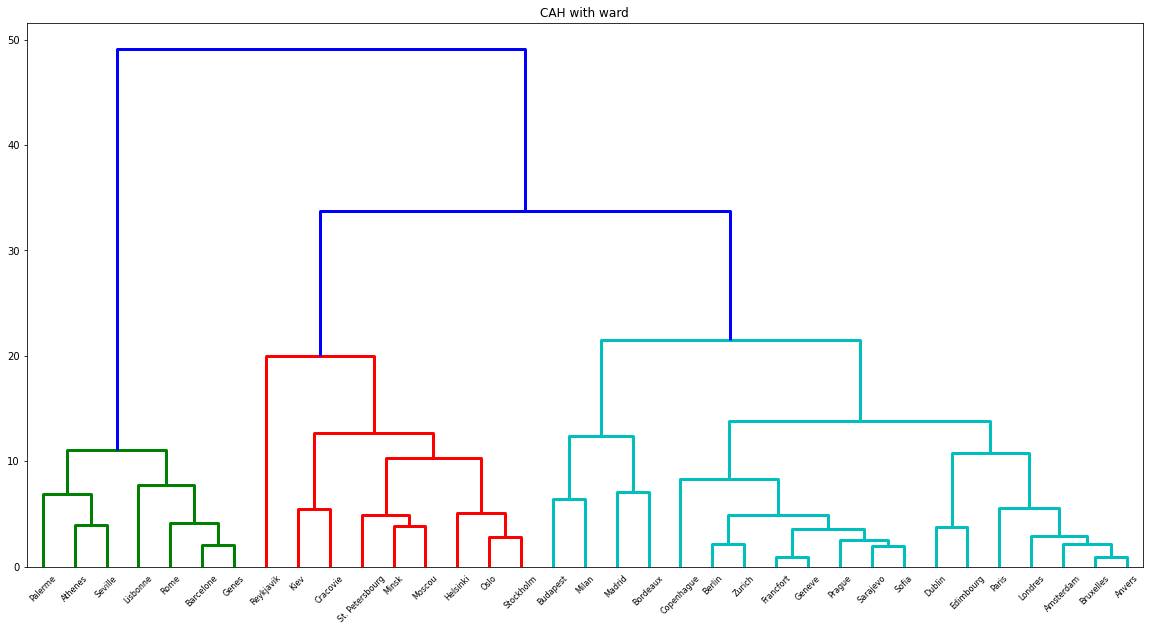

In [56]:
# Calculer les dissimilarités entres les clusters à chaque  ́etape:
Z = CAH(data, method='complete', metric='euclidean')

K =3
for i in range(1, 50):
    groupes_cah = fcluster(Z, t=i, criterion='distance')
    values = np.unique(groupes_cah)
    if len(values) == K:
        seuil = i
        break

nb_individus = np.unique(fcluster(Z, t=i, criterion='distance'), return_counts=True)
print(nb_individus)

# Calculer les dissimilarités entres les clusters à chaque étape:
plt.title("CAH in complete")
a = dendrogram(Z,labels=list(data.index),color_threshold=seuil)

# Calculer les dissimilarités entres les clusters à chaque  ́etape:
Z = CAH(data, method='ward', metric='euclidean')

#Avec ward 4 classes alors que complete 3 !
# Calculer les dissimilarités entres les clusters à chaque étape:
plt.title("CAH with ward")
#a = dendrogram(Z,labels=list(data.index),color_threshold=seuil)

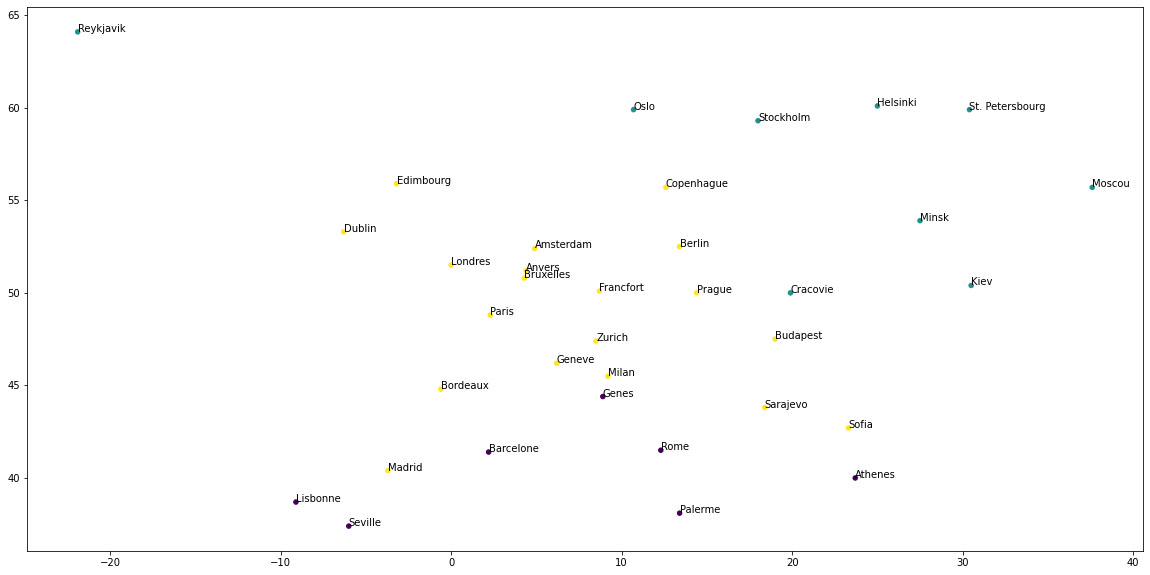

In [57]:

Coord = data_temperature.loc[:,['Latitude','Longitude']].values
#Cette ligne permet d’extraire les coordonn ́ees
plt.scatter(Coord[:, 1], Coord[:, 0], c= groupes_cah, s=20, cmap='viridis') #On place les points
nom_ville = list(data.index)
for i, txt in enumerate(nom_ville):
  plt.annotate(txt, (Coord[i, 1], Coord[i, 0])) #On place le nom des villes
plt.show()

2. Méthode des k-means

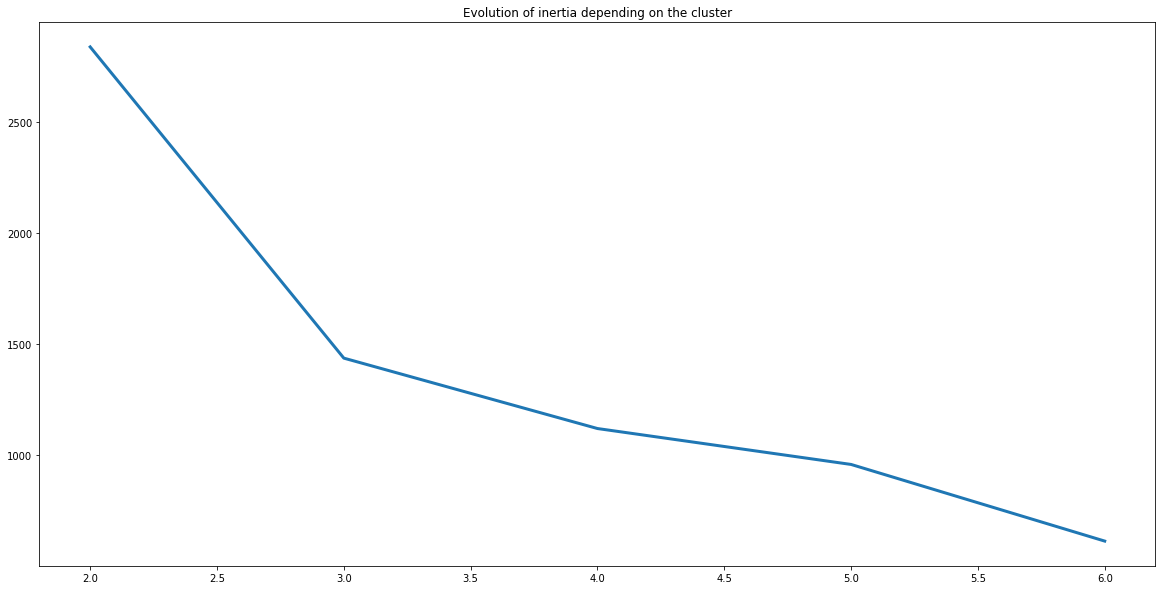

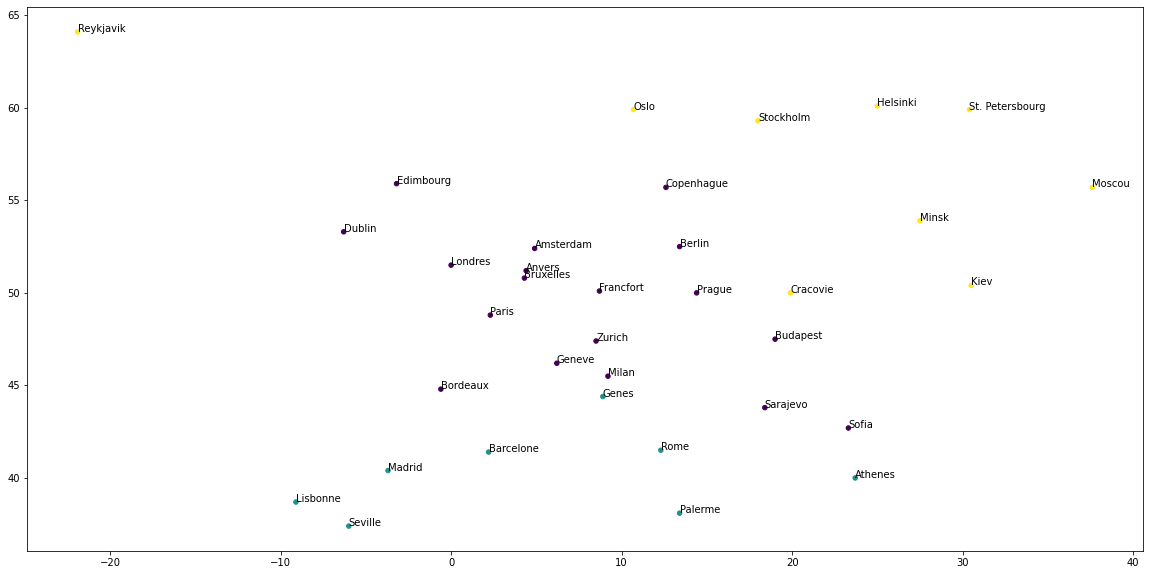

In [58]:
Clusters = np.arange(2,7,1)
i = 0
Inertia = np.zeros(5)
for K in Clusters:
    kmeans = KMeans(n_clusters=K, n_init=1, init='k-means++').fit(data)
    Inertia[i] = kmeans.inertia_
    i +=1

plt.plot(Clusters, Inertia)
plt.title("Evolution of inertia depending on the cluster")
plt.show()

kmeans = KMeans(n_clusters=3, n_init=1, init='k-means++').fit(data)

Coord = data_temperature.loc[:,['Latitude','Longitude']].values
#Cette ligne permet d’extraire les coordonn ́ees
plt.scatter(Coord[:, 1], Coord[:, 0], c=kmeans.labels_, s=20, cmap='viridis') #On place les points
nom_ville = list(data.index)
for i, txt in enumerate(nom_ville):
  plt.annotate(txt, (Coord[i, 1], Coord[i, 0])) #On place le nom des villes
plt.show()

3. Comparaison des classifications

Kmeans est mieux -> a compléter

2. Réalisation informatique et tests

2.1 Enoncé

In [76]:

def coalescence(x: np.array,K:int, g:np.array) -> np.array:
  if(len(x[0])< 2):
    print("Number of column for x is less than 2")
    raise
  if(len(g) != K or len(g[0]) != 2):
    print("Number of column for g is less than 2 or number of line is less than K")
    raise
  #centroid = sum(indiv)/nbIndiv
  #distance(x,y) = (x - y)**t * (x - y) ou x et y sont des matrices et t est la transposé
  clas = np.zeros(len(x))
  g2 = g[:].astype(np.float32)
  converge = False

  while(not(converge)):
    converge = True
    #étape 1 : réafectation des valeurs au centroïd(clas)
    for i in range(len(x)):
      dist = []
      for k in range(len(g2)):
        dist.append(np.matmul((x[i] - g[k]).T, (x[i] - g[k])))
      min_dist = dist.index(min(dist))
      if(clas[i] != min_dist):
        clas[i] = min_dist
        converge = False
    #étape 2 : calcul des nouveaux centroïd (g2)
    for k in range(len(g2)):
      sum = 0
      nb = 0
      for i in range(len(clas)):
        if(clas[i] == k):
          sum += x[i]
          nb += 1
      g2[k] = sum/nb
  return [clas, g2]

In [81]:
def show_graph_coalescence(data, K):
  g = data[np.random.choice(len(data), size=K), :] # randomly select 2 number and extract the rows of those 2 numbers
  clas1, g2 = coalescence(data, K, g)
  plt.scatter(data[:, 1], data[:, 0], c=clas1 , s=20, cmap='viridis') #On place les points
  for i in range(len(data)):
    plt.annotate(i, (data[i, 1], data[i, 0])) #On place les indices des points
  plt.title("Kmeans with a K of " + str(K))
  plt.show()

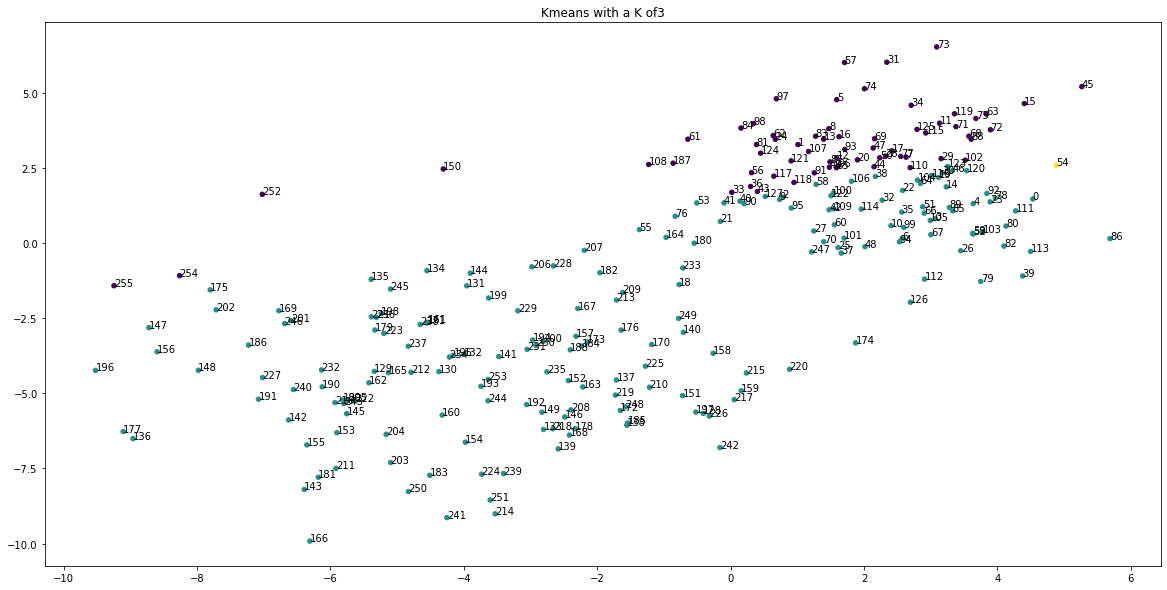

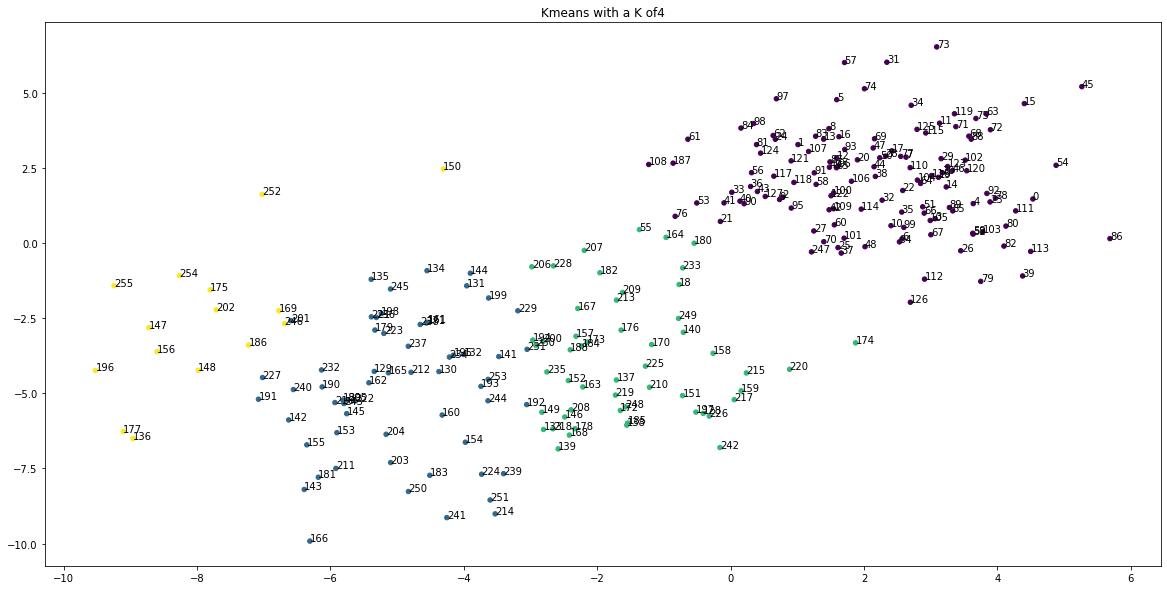

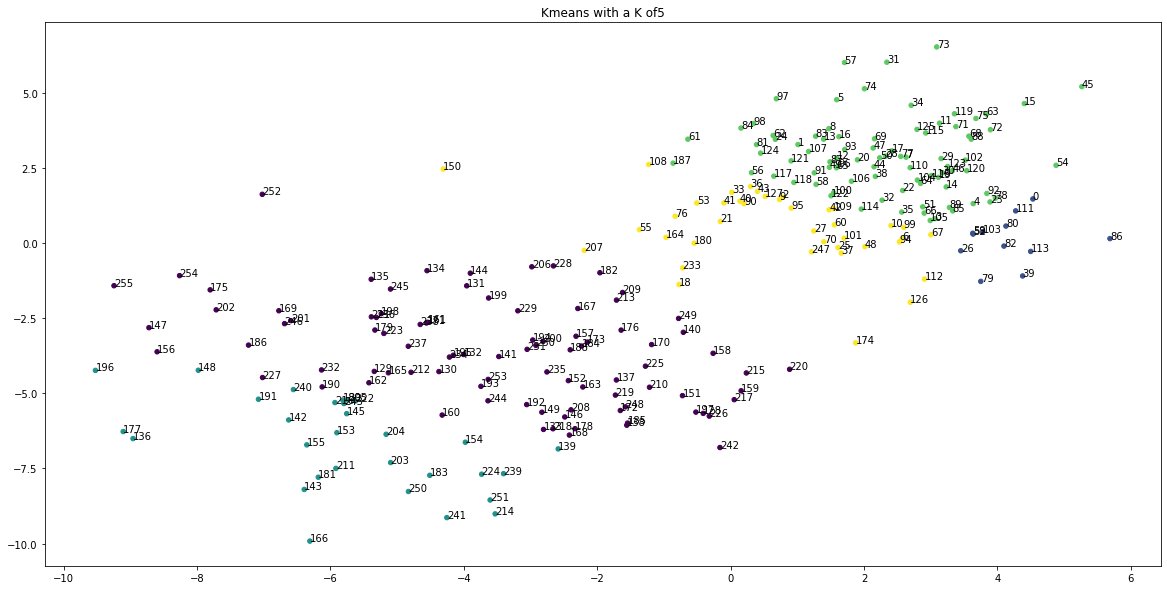

In [83]:
#Création du corpus de test
size = 128
mean1 = np.array([2, 2])
cov1 = np.array([[2, 0], 
                 [0, 2]])
X1 = (np.random.multivariate_normal(mean1, cov1, size))
mean2 = np.array([-4, -4])
cov2 = np.array([[6, 0], 
                 [0, 6]])
X2 = (np.random.multivariate_normal(mean2, cov2, size))
data = np.concatenate((X1, X2))

#we can try multiple values here
for i in range(3,6):
  show_graph_coalescence(data, i)